# Hyper-mutated and hypo-mutated threshold study and mutation frequency analysis

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Datasets/Breast Cancer (SMC 2018)")

# TOTAL DUCTAL 

In [5]:
data_mutation_TOTAL_ductal=pd.read_csv('mutation_table_Kan_et_al_Communications_2018_TOTAL_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal.iloc[:, 1:]
data_mutation_TOTAL_ductal

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087,123988087,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,316.0,ENST00000240874,646303
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720,114195720,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,533.0,ENST00000357077,565632
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742,186539742,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,979.0,ENST00000355634,371209
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828,140250828,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,714.0,ENST00000398640,143241
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210,2766210,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,118.0,ENST00000380773,21539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,brca_smc_2018_BR469,brca_smc_2018_BR469,PPIL2,22,22049731,22049731,Missense_Mutation,SNP,G,G,T,ENST00000412327.1:c.1511G>T,p.C504F,504.0,ENST00000412327,47746
6048,brca_smc_2018_BR469,brca_smc_2018_BR469,PORCN,X,48372705,48372705,Missense_Mutation,SNP,C,C,A,ENST00000326194.6:c.797C>A,p.A266D,266.0,ENST00000326194,11853
6049,brca_smc_2018_BR469,brca_smc_2018_BR469,KIF4A,X,69510430,69510430,Splice_Site,SNP,T,T,G,ENST00000374403.3:c.120+2T>G,p.X40_splice,40.0,ENST00000374403,130804
6050,brca_smc_2018_BR469,brca_smc_2018_BR469,MAML3,4,140811082,140811083,In_Frame_Ins,INS,-,-,TGT,ENST00000509479.2:c.1508_1509insCAA,p.Q503delinsHK,503.0,ENST00000509479,437432


In [6]:
# check if there are duplicate rows 
data_mutation_TOTAL_ductal.duplicated().sum()

0

### Mutation Rate analysis

In [7]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_TOTAL_ductal.loc[:, 'Mutation_length'] = data_mutation_TOTAL_ductal['End_Position']-data_mutation_TOTAL_ductal['Start_Position']+1

In [8]:
data_mutation_TOTAL_ductal['PATIENT_ID'].nunique()

164

In [9]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_TOTAL_ductal = data_mutation_TOTAL_ductal[['PATIENT_ID', 'Mutation_length']]

In [10]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_TOTAL_ductal_group_by_pts=pts_mutation_length_TOTAL_ductal.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_TOTAL_ductal_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [11]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_TOTAL_ductal = data_mutation_TOTAL_ductal[['Hugo_Symbol', 'Gene_length']]

In [12]:
# look at the number of distinct genes
gene_length_for_each_mutation_TOTAL_ductal['Hugo_Symbol'].nunique()

4482

In [13]:
# group by gene (Hugo_Symbol) 
mutation_TOTAL_ductal_group_by_gene=gene_length_for_each_mutation_TOTAL_ductal.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [14]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_TOTAL_ductal = mutation_TOTAL_ductal_group_by_gene['Gene_length'].sum()

In [15]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_TOTAL_ductal_group_by_pts["Mutation_rate"] = mutation_TOTAL_ductal_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_TOTAL_ductal

In [16]:
# multiply the Mutation_rate values for 10^6
mutation_TOTAL_ductal_group_by_pts["Mutation_rate*10^6"] = mutation_TOTAL_ductal_group_by_pts["Mutation_rate"]*1000000

In [17]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_TOTAL_ductal_group_by_pts= mutation_TOTAL_ductal_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [18]:
patient_mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [19]:
# adjust the indices
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.reset_index()
patient_mutation_rate_TOTAL_ductal = patient_mutation_rate_TOTAL_ductal.drop('index', axis=1)

In [20]:
array_mutation_rate_TOTAL_ductal = np.array(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6'])

In [21]:
patients_TOTAL_ductal=np.arange(0,164,1)
# convert a series into a Numpy array
mutation_rate_TOTAL_ductal=mutation_TOTAL_ductal_group_by_pts[['Mutation_rate*10^6']].to_numpy()

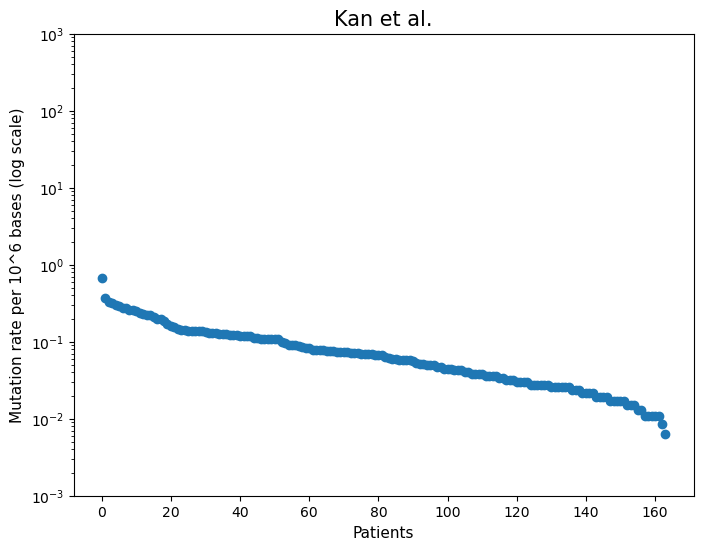

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
#plt.axvline(x=162, color='red', linestyle='-', linewidth = 1, label='x = 162')

plt.xlabel("Patients", fontsize=11)
plt.ylabel("Mutation rate per 10^6 bases (log scale)", fontsize=11)

plt.title("Kan et al.", fontsize=15)
plt.show()

### Hypo-mutated threshold - manual study

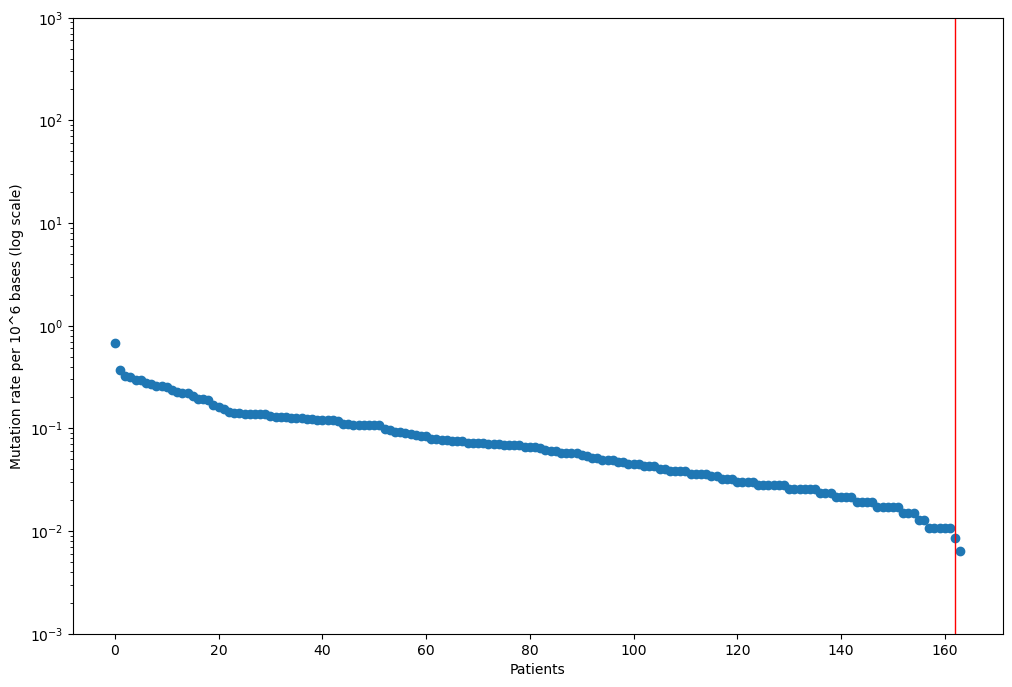

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.axvline(x=162, color='red', linestyle='-', linewidth = 1, label='x = 162')
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

In [24]:
len(patients_TOTAL_ductal)


164

In [25]:
y=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

### Study of the thresholds with KneeLocator

In [26]:
colonne_iper = ['Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap']
df_soglia_iper = pd.DataFrame(columns = colonne_iper)

157
dx_3: 156
yx_3: -1.8918399089622915
dx_4: 157
yx_4: -1.9710211550099164
gap_max 0.07918124604762489
dim_finale_x_sx: 156
dim_inizio_y_sx: 8
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155]
[-0.16756404 -0.43194506 -0.48814757 -0.50267382 -0.52386312 -0.53011207
 -0.55604781 -0.56618744 -0.58720579 -0.58720579 -0.59810915 -0.62859847
 -0.64468529 -0.65715393 -0.65715393 -0.68321943 -0.71094977 -0.71094977
 -0

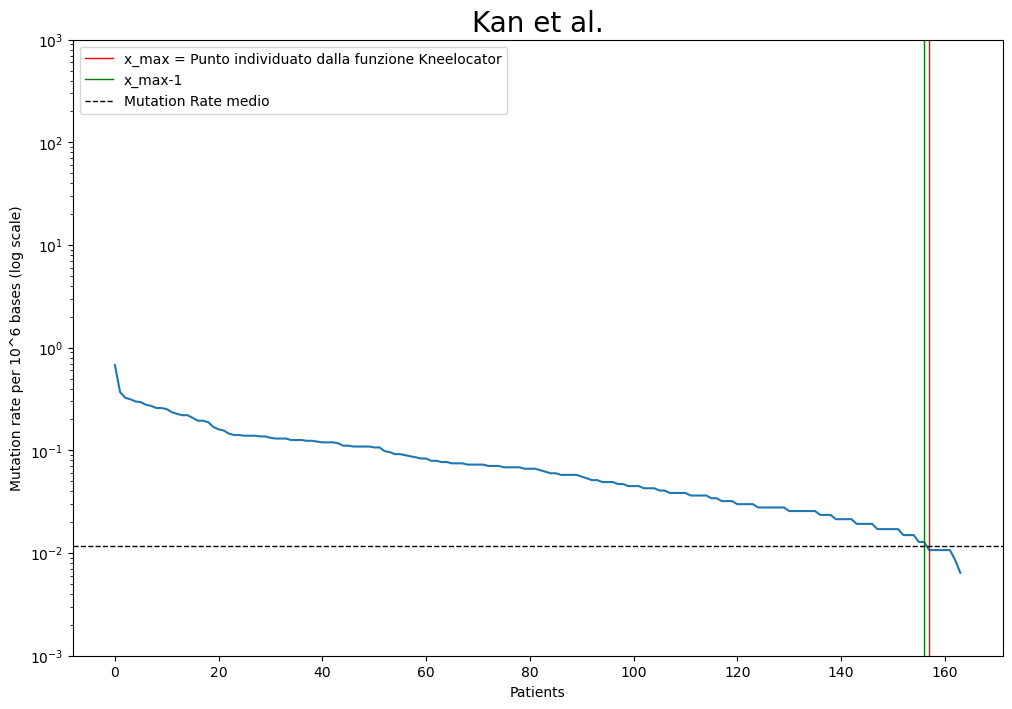

In [27]:
from kneed import KneeLocator, DataGenerator as dg

x_Kan=patients_TOTAL_ductal
y_Kan=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Kan, y_Kan, S=0.1, curve="convex", direction="decreasing", online = True)
print(kl.knee)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Kan[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Kan[x3]
#dim_inizio_x = 0
#dim_finale_x = len(x_Kan) #164
#dim_inizio_y = 0
dim_finale_y = len(y_Kan) #164

print('dx_3:', x3)   #dx_3: 156
print('yx_3:', y3)   #yx_3: -1.8918399089622915
print('dx_4:', x4)   #dx_4: 157
print('yx_4:', y4)   #yx_4: -1.9710211550099164

gap_max_Kan = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
print('gap_max', gap_max_Kan) #gap_max 0.07918124604762489
x_max_Kan = x3

dim_finale_x = x3
print('dim_finale_x_sx:', dim_finale_x)   #156
dim_inizio_y = dim_finale_y - x3 # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali

print('dim_inizio_y_sx:', dim_inizio_y)   # 8

x_sub = x_Kan[0:dim_finale_x] # da 0 a 156 --> 156 = lunghezza del vettore
y_sub = y_Kan[0:x3] # da 8 a 164 --> 156 = lunghezza del vettore
# x_sub e y_sub hanno la stessa lunghezza

print(x_sub)
print(y_sub)

while (dim_finale_x > 1): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    print(kl.knee)

    x4 = kl.knee
    y4 = y_Kan[x4]
    x3 = kl.knee - 1
    y3 = y_Kan[x3]

    print('dx_3:', x3)   
    print('yx_3:', y3)
    print('dx_4:', x4)
    print('yx_4:', y4)

    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 
    print('gap', gap)

    if gap > gap_max_Kan: # aggiorna il gap massimo!!!
        gap_max_Kan = gap
        print('gap_max:',gap_max_Kan)
        x_max_Kan = x4  # x4 > x3
        print('x:',x_max_Kan)
    

    dim_finale_x = x3
    print('dim_finale_x:', dim_finale_x)
    dim_inizio_y = dim_finale_y - x3
    #dim_finale_y = x3
    print('dim_inizio_y:', dim_inizio_y)

    x_sub = x_Kan[0:dim_finale_x]
    y_sub = y_Kan[0:x3]

    print(x_sub)
    print(y_sub)
    
y_max_Kan_inf = array_mutation_rate_TOTAL_ductal[x_max_Kan+1]
y_max_Kan_sup = array_mutation_rate_TOTAL_ductal[x_max_Kan]
y_max_Kan_avg = (y_max_Kan_inf + y_max_Kan_sup)/2
y_grafico_media = (y_Kan[x_max_Kan]+y_Kan[x_max_Kan-1])/2
print('gap_max:',gap_max_Kan)
print('x:',x_max_Kan)
print('mutation rate inf:', y_max_Kan_inf)
print('mutation rate sup:', y_max_Kan_sup)
print('mutation rate avg:', y_max_Kan_avg)
fig = plt.figure(figsize=(12, 8))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Kan et al.",fontsize=20)
plt.axvline(x=x_max_Kan+1, color='red', linestyle='-', linewidth = 1,  label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axvline(x=x_max_Kan, color='green', linestyle='-', linewidth = 1, label = 'x_max-1')
plt.axhline(y=y_max_Kan_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend()
#set axes limit
plt.ylim(0.001, 1000)
plt.show()

#'Studio', 'x_max', 'mutation rate x_max', 'x_max+1', 'mutation_rate x_max+1', 'gap'
#df_soglia_iper = df_soglia_iper.append({'Studio': 'Kan et al.', 'x_max': x_max_Kan, 'mutation rate x_max':y_max_Kan_sup,  'x_max+1': x_max_Kan+1, 'mutation_rate x_max+1': y_max_Kan_inf,'gap': gap_max_Kan }, ignore_index=True)

## ZOOM

(0.010690028055337229, 0.019242050499607012)

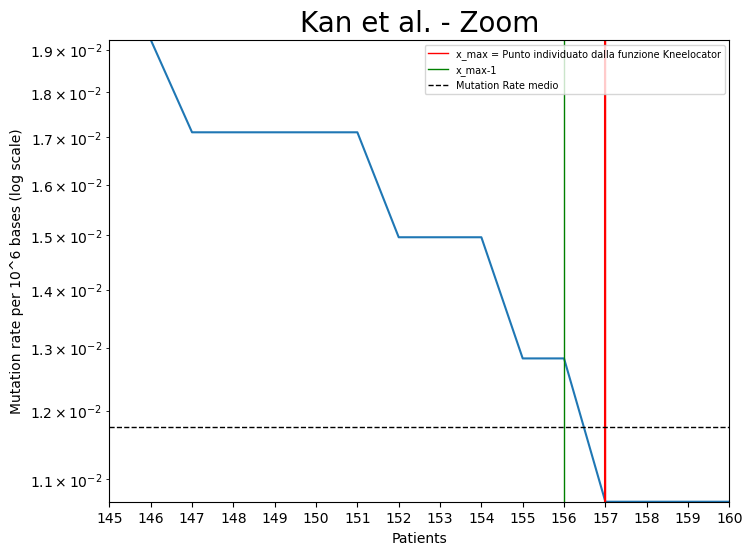

In [28]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xticks(np.arange(min(patients_TOTAL_ductal), max(patients_TOTAL_ductal)+1, 1.0))
plt.yscale("log")
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.title ("Kan et al. - Zoom",fontsize=20)
plt.axvline(x=x_max_Kan+1, color='red', linestyle='-')
x1_Kan, y1_Kan = (patients_TOTAL_ductal[145], patient_mutation_rate_TOTAL_ductal.loc[145, 'Mutation_rate*10^6'])
x2_Kan, y2_Kan = (patients_TOTAL_ductal[160], patient_mutation_rate_TOTAL_ductal.loc[160, 'Mutation_rate*10^6'])
plt.axvline(x=x_max_Kan+1, color='red', linestyle='-', linewidth = 1,  label = 'x_max = Punto individuato dalla funzione Kneelocator')
plt.axvline(x=x_max_Kan, color='green', linestyle='-', linewidth = 1, label = 'x_max-1')
plt.axhline(y=y_max_Kan_avg, color='black', linestyle='--', linewidth = 1, label = 'Mutation Rate medio')
plt.legend(loc='upper right', fontsize = 7)
plt.gca().set_xlim(x1_Kan, x2_Kan)
plt.gca().set_ylim(y2_Kan, y1_Kan)

### Manual study of the thresholds

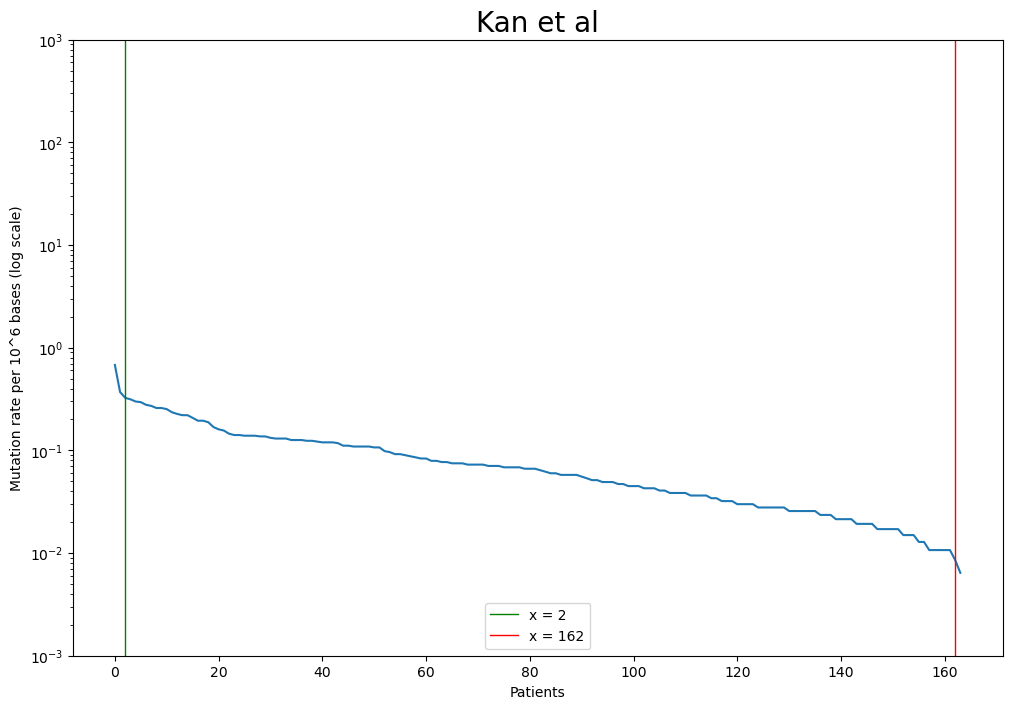

In [29]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients_TOTAL_ductal, mutation_rate_TOTAL_ductal)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
# soglia ipermutati
plt.axvline(x=2, color='green', linestyle='-', linewidth = 1, label='x = 2')
# soglia ipomutati
plt.axvline(x=162, color='red', linestyle='-', linewidth = 1, label='x = 162')
plt.title ("Kan et al",fontsize=20)
plt.legend()
plt.show()

In [30]:
# create a table containing the iterated values: x3, y3, x4, y4, gap. For each row, one iteration.

x_Kan=patients_TOTAL_ductal
y_Kan=np.array(np.log10(mutation_TOTAL_ductal_group_by_pts['Mutation_rate*10^6']))

#punto di destra
kl = KneeLocator(x_Kan, y_Kan, S=0.1, curve="convex", direction="decreasing", online = True)

x4 = kl.knee #primo punto che si trova considerando l'intera curva
y4 = y_Kan[x4]
x3 = kl.knee -1 # x3 è minore di x4; visto che la funzione è decrescente y3 sarà maggiore di y4
y3 = y_Kan[x3]
dim_inizio_x = 0
dim_finale_x = len(x_Kan) #164
dim_inizio_y = 0
dim_finale_y = len(y_Kan) #164

gap_Kan = abs(y4 - y3) # visto che la funzione è decrescente. Il gap si riferisce alla ripidità della curva.
x_max_Kan = x3

data = [[x4, y4, x3, y3, gap_Kan]] # inizializzo data con il primo risultato di Kneelocator

dim_finale_x = x3
dim_inizio_y = dim_finale_y - x3 # !! In questo modo, i sub-intervalli considerati sia per x che per y sono uguali

x_sub = x_Kan[0:dim_finale_x] # da 0 a 156 --> 156 = lunghezza del vettore
y_sub = y_Kan[0:x3] # da 8 a 164 --> 156 = lunghezza del vettore
# x_sub e y_sub hanno la stessa lunghezza

while (dim_finale_x > 1): # Questo limite (1) può variare in base al dataset
    kl = KneeLocator(x_sub, y_sub, S=0.1, curve="convex", direction="decreasing", online = True)
    
    x4 = kl.knee
    y4 = y_Kan[x4]
    x3 = kl.knee - 1
    y3 = y_Kan[x3]
    gap = abs(y4 - y3) # essendo la funzione decrescente, se x4 > x3, allora y4 < y3 

    data.append([x4, y4, x3, y3, gap])
  
    dim_finale_x = x3
    dim_inizio_y = dim_finale_y - x3
    dim_finale_y = x3
   
    x_sub = x_Kan[0:x3]
    y_sub = y_Kan[0:x3]
    
cols=['x4','y4','x3','y3','gap']
result_KneeLocator = pd.DataFrame(data, columns=cols)  
result_KneeLocator

,x4,y4,x3,y3,gap
0,157,-1.971021,156,-1.891840,0.079181
1,152,-1.824893,151,-1.766901,0.057992
2,147,-1.766901,146,-1.715749,0.051153
3,143,-1.715749,142,-1.669991,0.045757
4,139,-1.669991,138,-1.628598,0.041393
5,136,-1.628598,135,-1.590810,0.037789
6,130,-1.590810,129,-1.556048,0.034762
7,124,-1.556048,123,-1.523863,0.032185
8,120,-1.523863,119,-1.493900,0.029963
9,117,-1.493900,116,-1.465871,0.028029


In [31]:
result_KneeLocator2 = result_KneeLocator.sort_values('x4')

### Mutation Frequency analysis

In [32]:
genes_patients_TOTAL_ductal=data_mutation_TOTAL_ductal[['PATIENT_ID', 'Hugo_Symbol']]

In [33]:
# drop duplicates
genes_patients_TOTAL_ductal=genes_patients_TOTAL_ductal.drop_duplicates()

In [34]:
n_of_pts_per_gene_TOTAL_ductal= genes_patients_TOTAL_ductal.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_TOTAL_ductal.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [35]:
tot_pts_TOTAL_ductal = 164 

In [36]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_TOTAL_ductal["Mutation_frequency (%)"] = (n_of_pts_per_gene_TOTAL_ductal["Num_pts_per_gene"]*100)/tot_pts_TOTAL_ductal

In [37]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_TOTAL_ductal= n_of_pts_per_gene_TOTAL_ductal.sort_values(by="Num_pts_per_gene", ascending=False)

In [38]:
gene_mutation_frequency_TOTAL_ductal = n_of_pts_per_gene_TOTAL_ductal[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [39]:
# select the first 50 genes
highest_mutated_genes_TOTAL_ductal=gene_mutation_frequency_TOTAL_ductal.head(50)

In [40]:
mutated_gene_names=highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'].tolist()

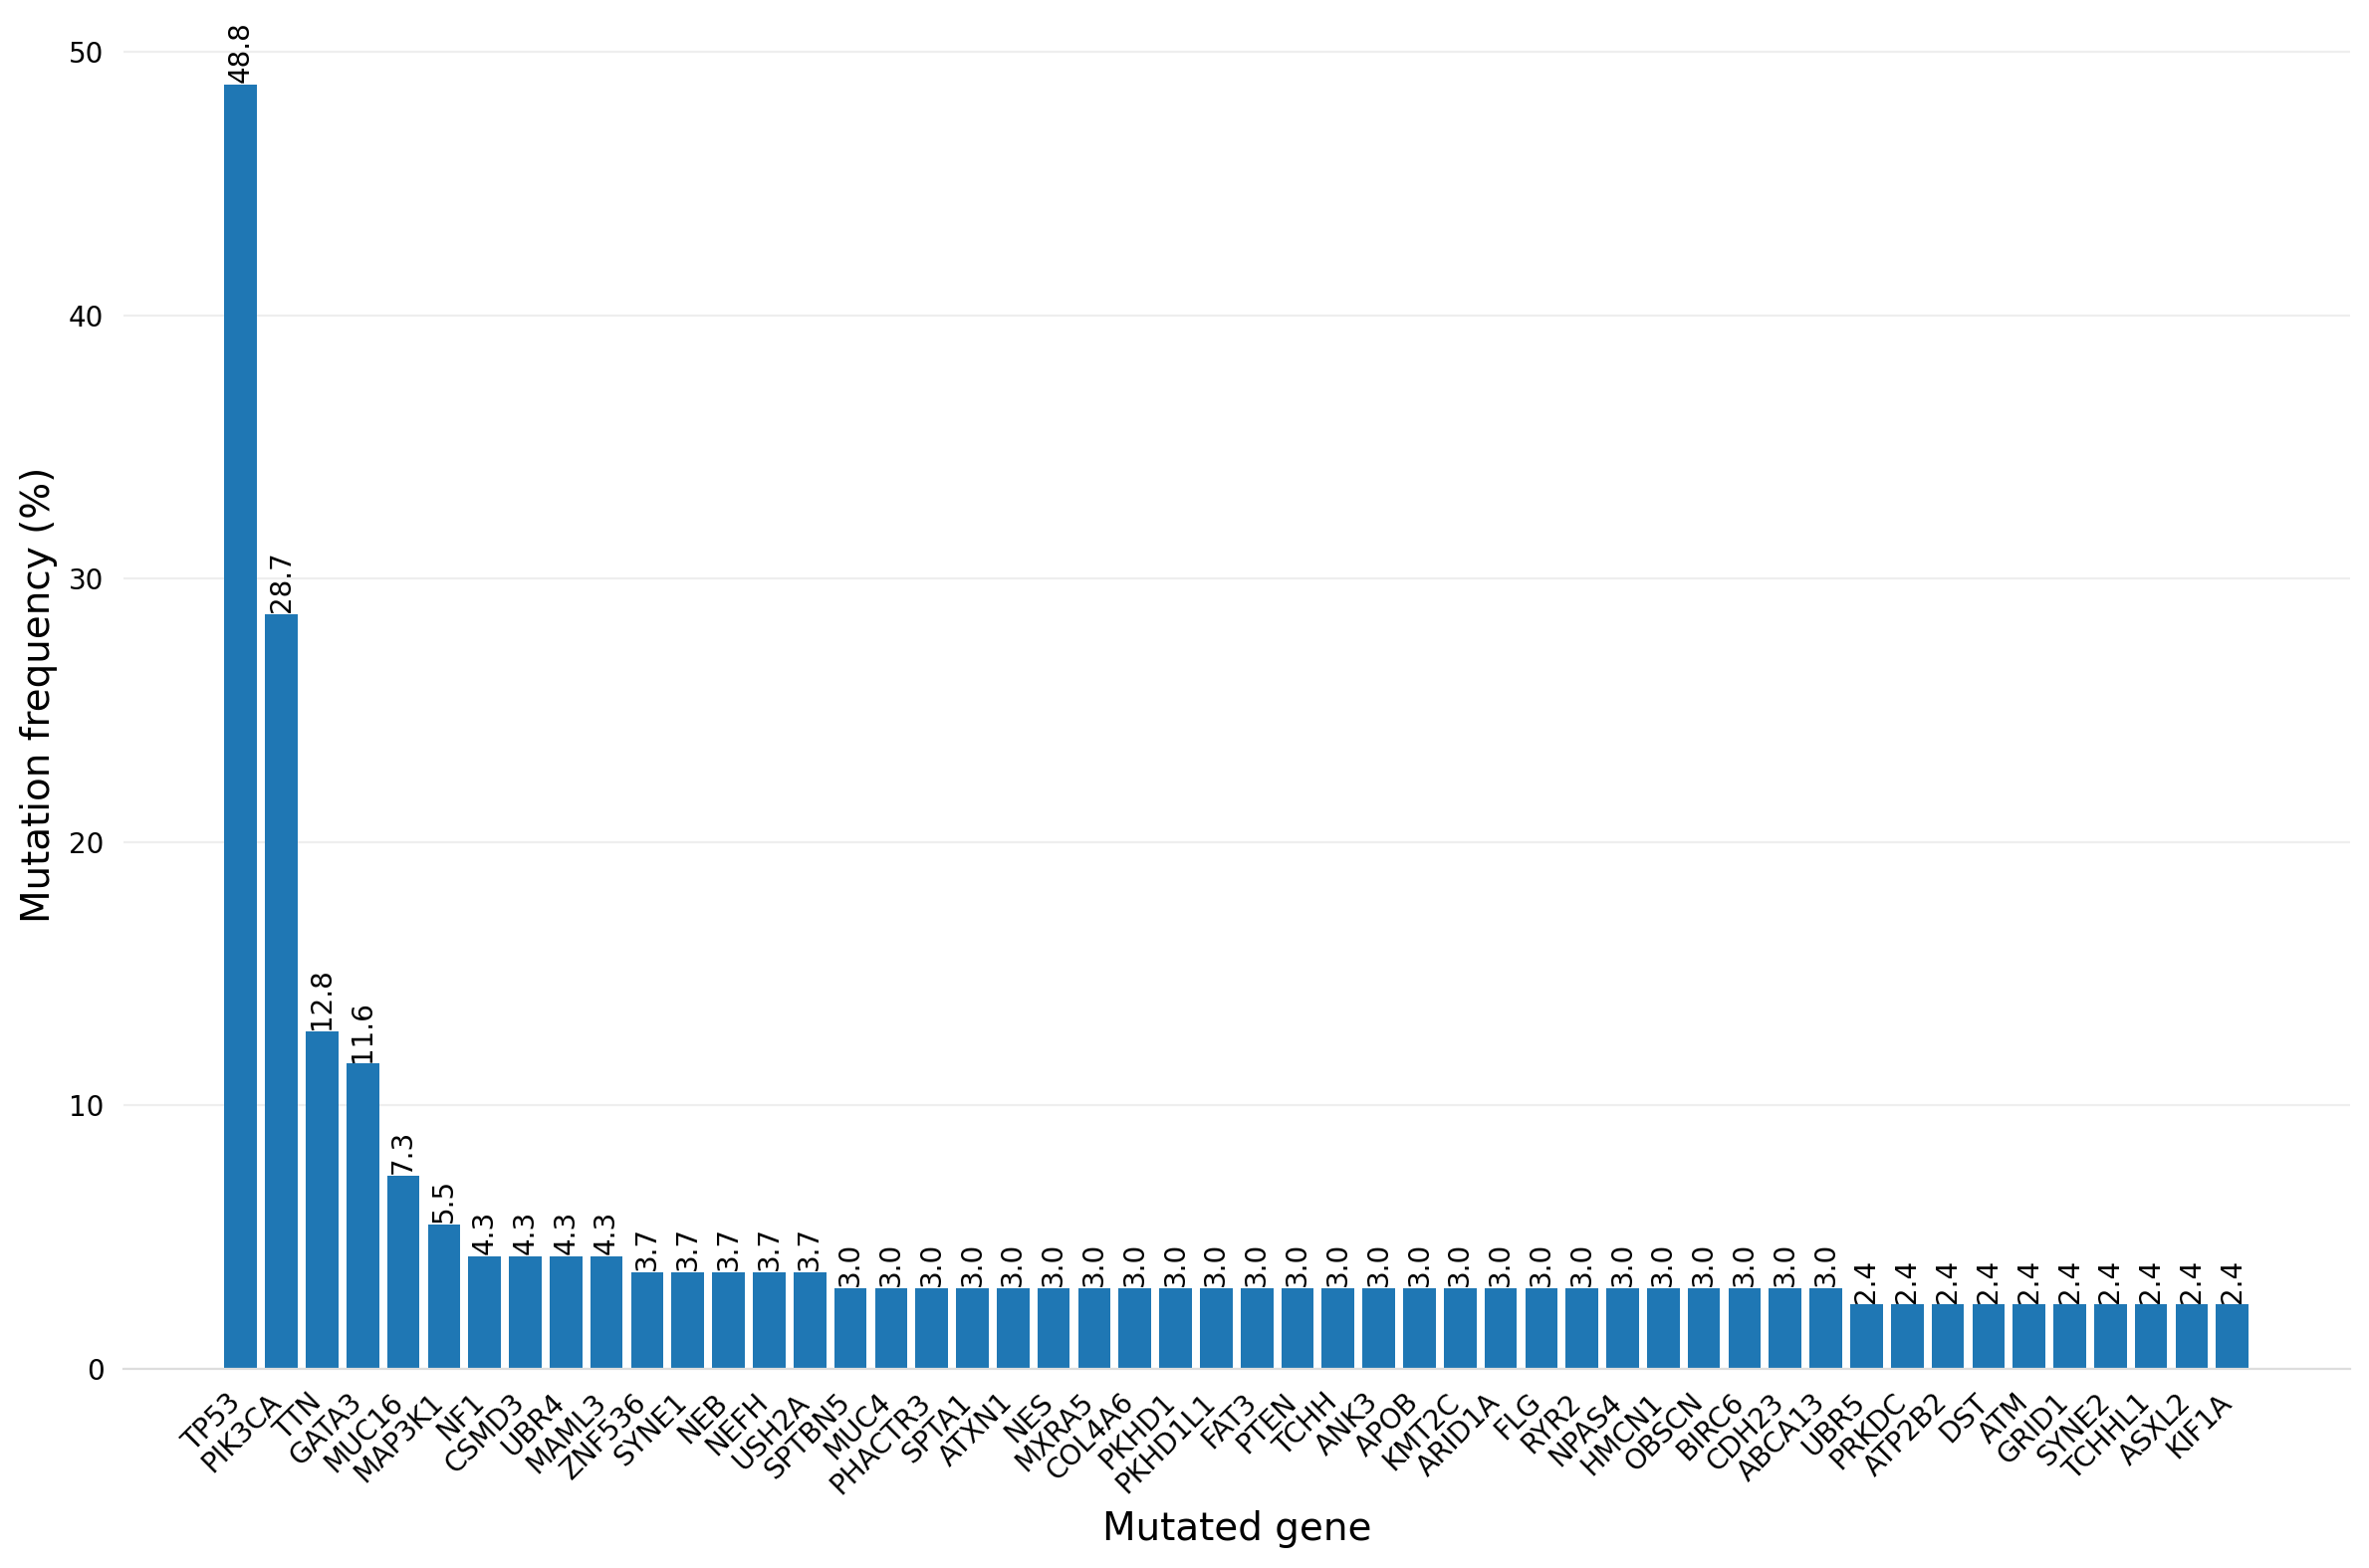

In [41]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_TOTAL_ductal['Hugo_Symbol'], highest_mutated_genes_TOTAL_ductal['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL and TRIPLE-NEGATIVE 

### Mutation Rate analysis

In [42]:
data_mutation_ductal_TN=pd.read_csv('mutation_table_Kan_et_al_Communications_2018_TN_and_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_TN = data_mutation_ductal_TN.iloc[:, 1:]

In [43]:
# check if there are duplicate rows 
data_mutation_ductal_TN.duplicated().sum()

0

In [44]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_TN['End_Position']-data_mutation_ductal_TN['Start_Position']+1

In [45]:
data_mutation_ductal_TN['PATIENT_ID'].nunique()

35

In [46]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_TN = data_mutation_ductal_TN[['PATIENT_ID', 'Mutation_length']]

In [47]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_TN_group_by_pts=pts_mutation_length_ductal_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [48]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_TN = data_mutation_ductal_TN[['Hugo_Symbol', 'Gene_length']]

In [49]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_TN['Hugo_Symbol'].nunique()

1616

In [50]:
# group by gene (Hugo_Symbol) 
mutation_ductal_TN_group_by_gene=gene_length_for_each_mutation_ductal_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [51]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_TN = mutation_ductal_TN_group_by_gene['Gene_length'].sum()

In [52]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_TN_group_by_pts["Mutation_rate"] = mutation_ductal_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_TN

In [53]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_TN_group_by_pts["Mutation_rate"]*1000000

In [54]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_TN_group_by_pts= mutation_ductal_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [55]:
patient_mutation_rate_ductal_TN=mutation_ductal_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [56]:
patients=np.arange(0,35,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

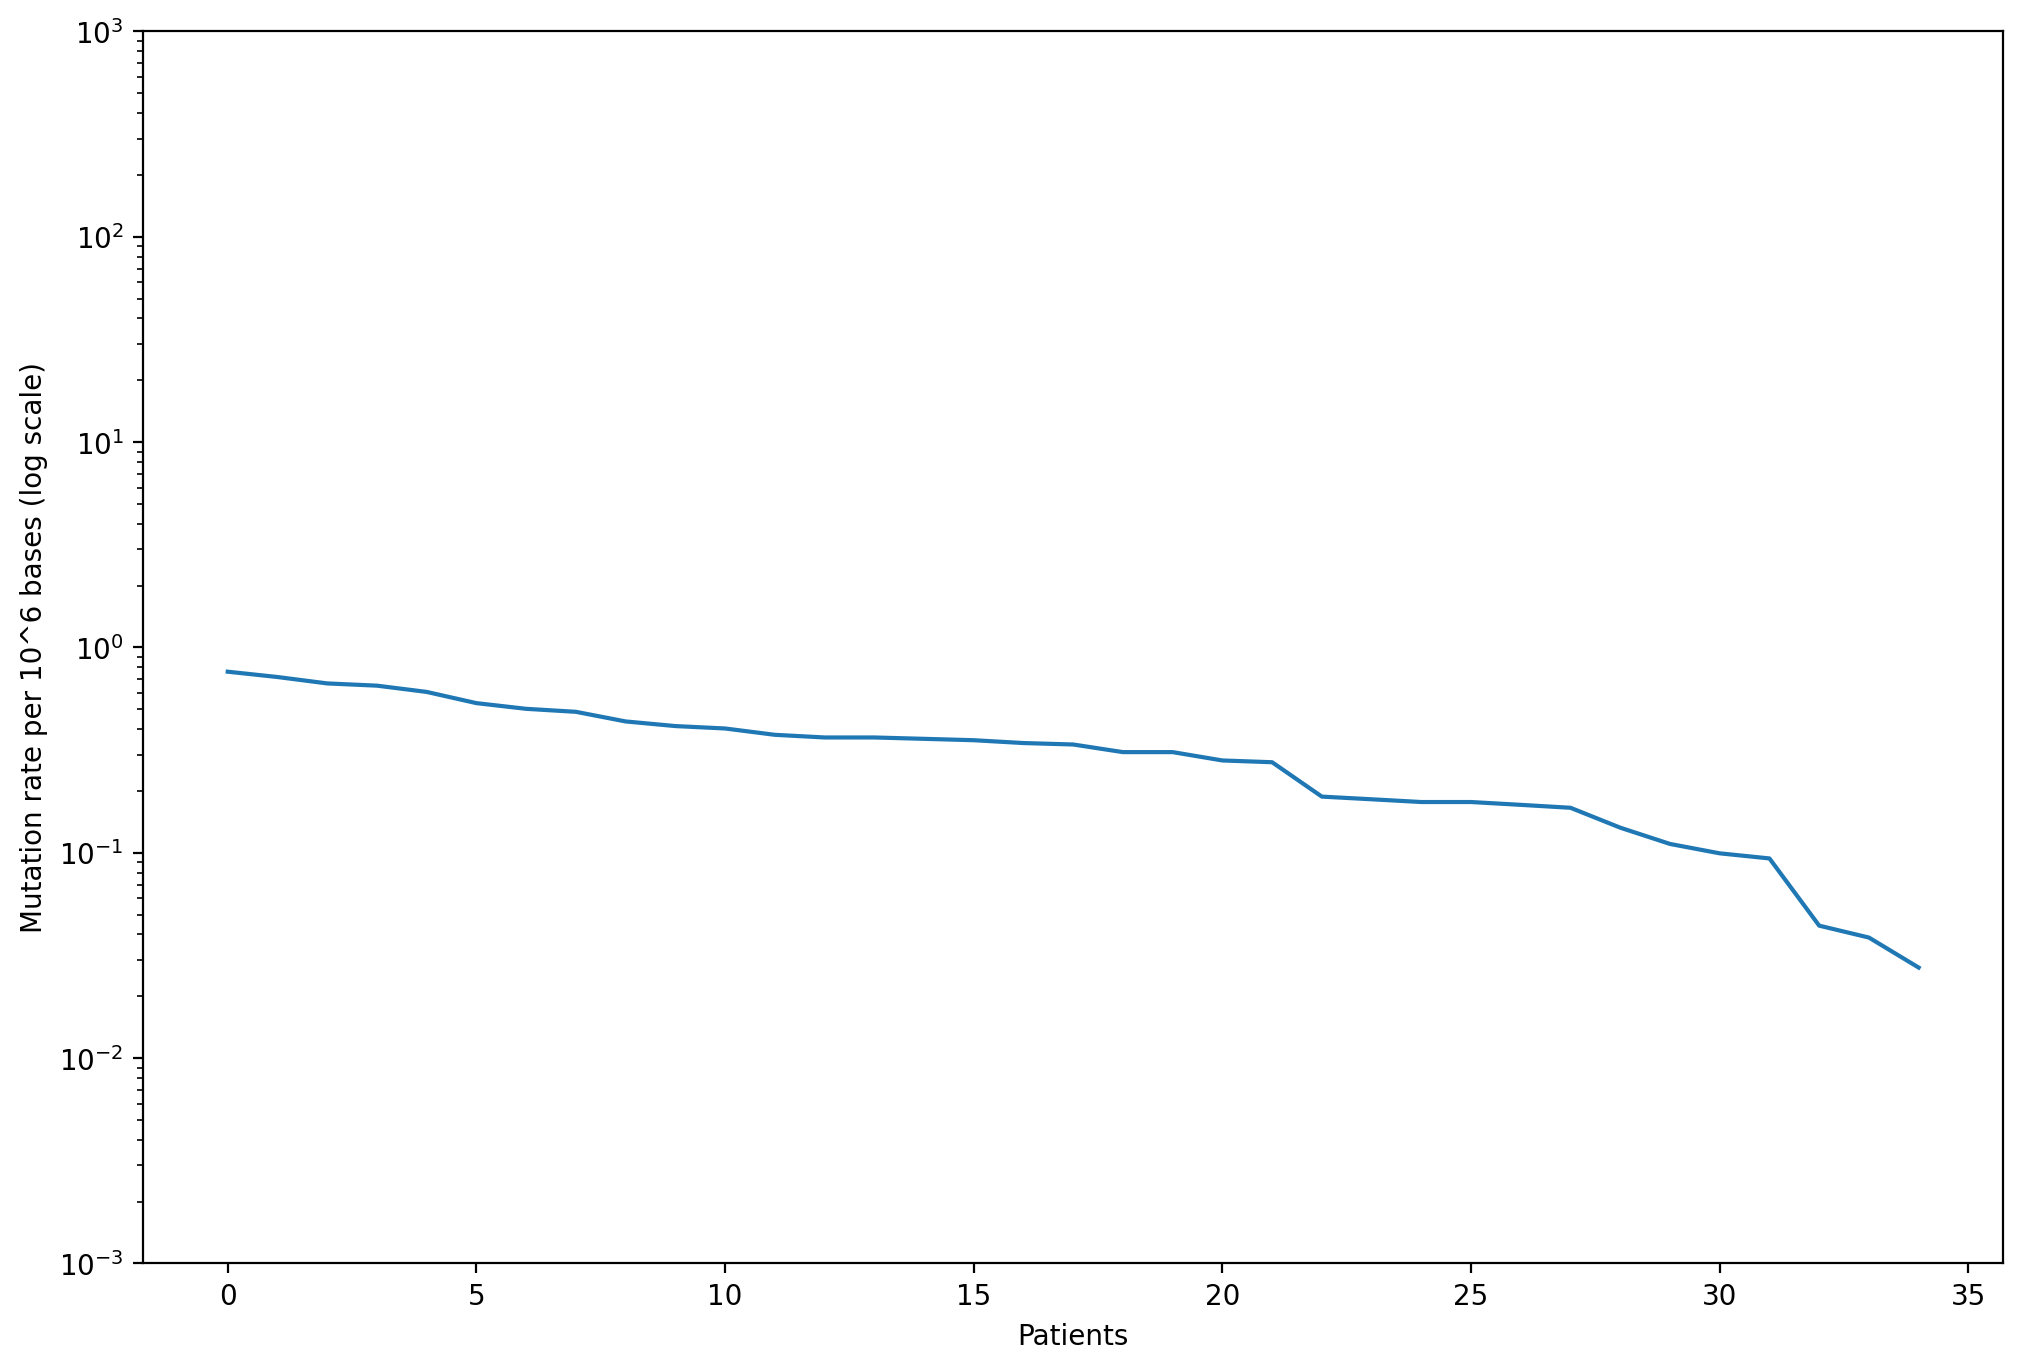

In [57]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.plot(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [58]:
genes_patients_ductal_TN=data_mutation_ductal_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [59]:
# drop duplicates
genes_patients_ductal_TN=genes_patients_ductal_TN.drop_duplicates()

In [60]:
n_of_pts_per_gene_ductal_TN= genes_patients_ductal_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [61]:
tot_pts_ductal_TN = 35

In [62]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_TN

In [63]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_TN= n_of_pts_per_gene_ductal_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [64]:
gene_mutation_frequency_ductal_TN = n_of_pts_per_gene_ductal_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [65]:
# select the first 50 genes
highest_mutated_genes_ductal_TN=gene_mutation_frequency_ductal_TN.head(50)

In [66]:
mutated_gene_names=highest_mutated_genes_ductal_TN['Hugo_Symbol'].tolist()

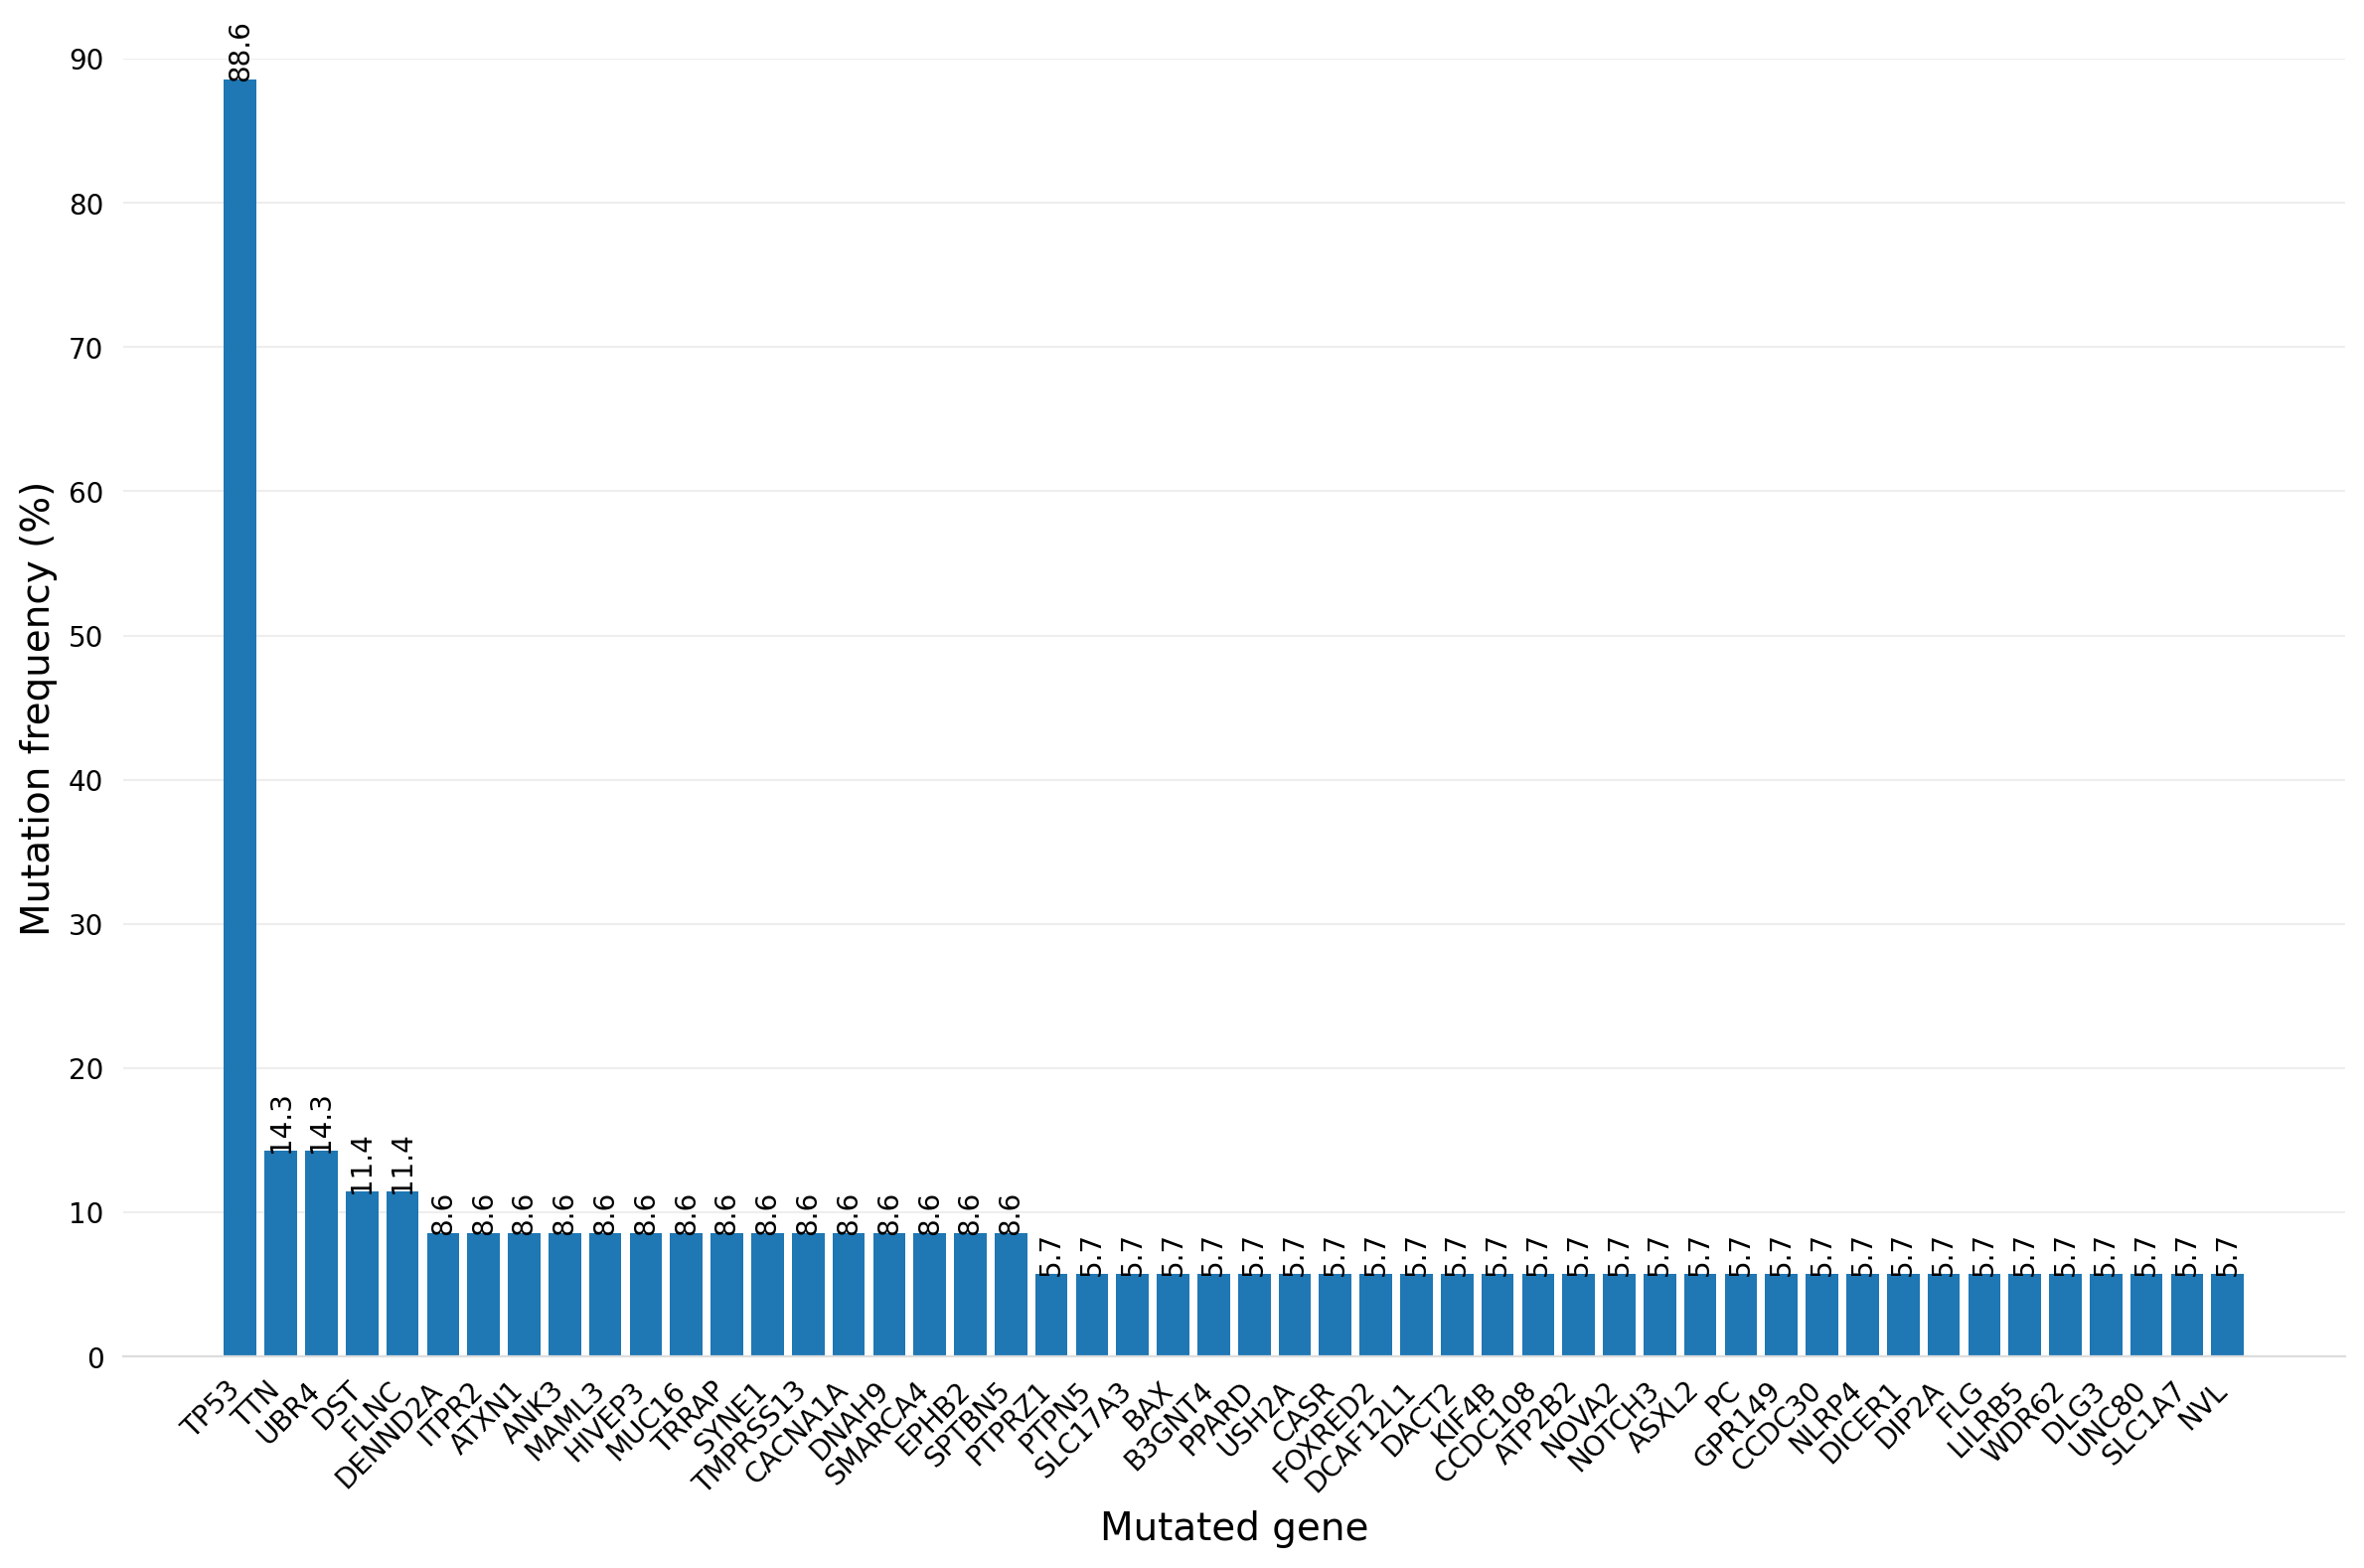

In [67]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_TN['Hugo_Symbol'], highest_mutated_genes_ductal_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 90)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

# DUCTAL NON TRIPLE-NEGATIVE 

### Mutation Rate analysis

In [68]:
data_mutation_ductal_NON_TN=pd.read_csv('mutation_table_Kan_et_al_Communications_2018_NON_TN_and_ductal.csv', sep=None, engine='python')
# delete the first column, that shows the number of each row
data_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN.iloc[:, 1:]

In [69]:
# check if there are duplicate rows 
data_mutation_ductal_NON_TN.duplicated().sum()

0

In [70]:
# add a column to the dataset representing the mutated bases length (End_Position-Start_Position+1)
data_mutation_ductal_NON_TN.loc[:, 'Mutation_length'] = data_mutation_ductal_NON_TN['End_Position']-data_mutation_ductal_NON_TN['Start_Position']+1

In [71]:
data_mutation_ductal_NON_TN['PATIENT_ID'].nunique()

129

In [72]:
# extract PATIENT_ID and Mutation_length
pts_mutation_length_ductal_NON_TN = data_mutation_ductal_NON_TN[['PATIENT_ID', 'Mutation_length']]

In [73]:
# group by PATIENT_ID and sum the mutation lengths for each pts
mutation_ductal_NON_TN_group_by_pts=pts_mutation_length_ductal_NON_TN.groupby(['PATIENT_ID'])['Mutation_length'].sum().reset_index()
mutation_ductal_NON_TN_group_by_pts.rename(columns = {'Mutation_length':'Total_sum_mutated_bases'}, inplace = True)

In [74]:
# extract Hugo_Symbol and Gene_length
gene_length_for_each_mutation_ductal_NON_TN = data_mutation_ductal_NON_TN[['Hugo_Symbol', 'Gene_length']]

In [75]:
# look at the number of distinct genes
gene_length_for_each_mutation_ductal_NON_TN['Hugo_Symbol'].nunique()

3345

In [76]:
# group by gene (Hugo_Symbol) 
mutation_ductal_NON_TN_group_by_gene=gene_length_for_each_mutation_ductal_NON_TN.groupby(['Hugo_Symbol'])['Gene_length'].max().reset_index()

In [77]:
# compute the total gene length (for all the genes in the dataset)
total_GeneLength_ductal_NON_TN = mutation_ductal_NON_TN_group_by_gene['Gene_length'].sum()

In [78]:
# add a column to the dataset representing the mutation rate for each patient (Mutation_rate= Mutation_length/total_gene_length)
mutation_ductal_NON_TN_group_by_pts["Mutation_rate"] = mutation_ductal_NON_TN_group_by_pts["Total_sum_mutated_bases"]/total_GeneLength_ductal_NON_TN

In [79]:
# multiply the Mutation_rate values for 10^6
mutation_ductal_NON_TN_group_by_pts["Mutation_rate*10^6"] = mutation_ductal_NON_TN_group_by_pts["Mutation_rate"]*1000000

In [80]:
# the PATIENT_IDs are sorted for descending order of mutation rate 
mutation_ductal_NON_TN_group_by_pts= mutation_ductal_NON_TN_group_by_pts.sort_values(by="Mutation_rate", ascending=False)

In [81]:
patient_mutation_rate_ductal_NON_TN=mutation_ductal_NON_TN_group_by_pts[['PATIENT_ID', 'Mutation_rate*10^6' ]]

In [82]:
patients=np.arange(0,129,1)
# convert a series into a Numpy array
mutation_rate=mutation_ductal_NON_TN_group_by_pts[['Mutation_rate*10^6']].to_numpy()

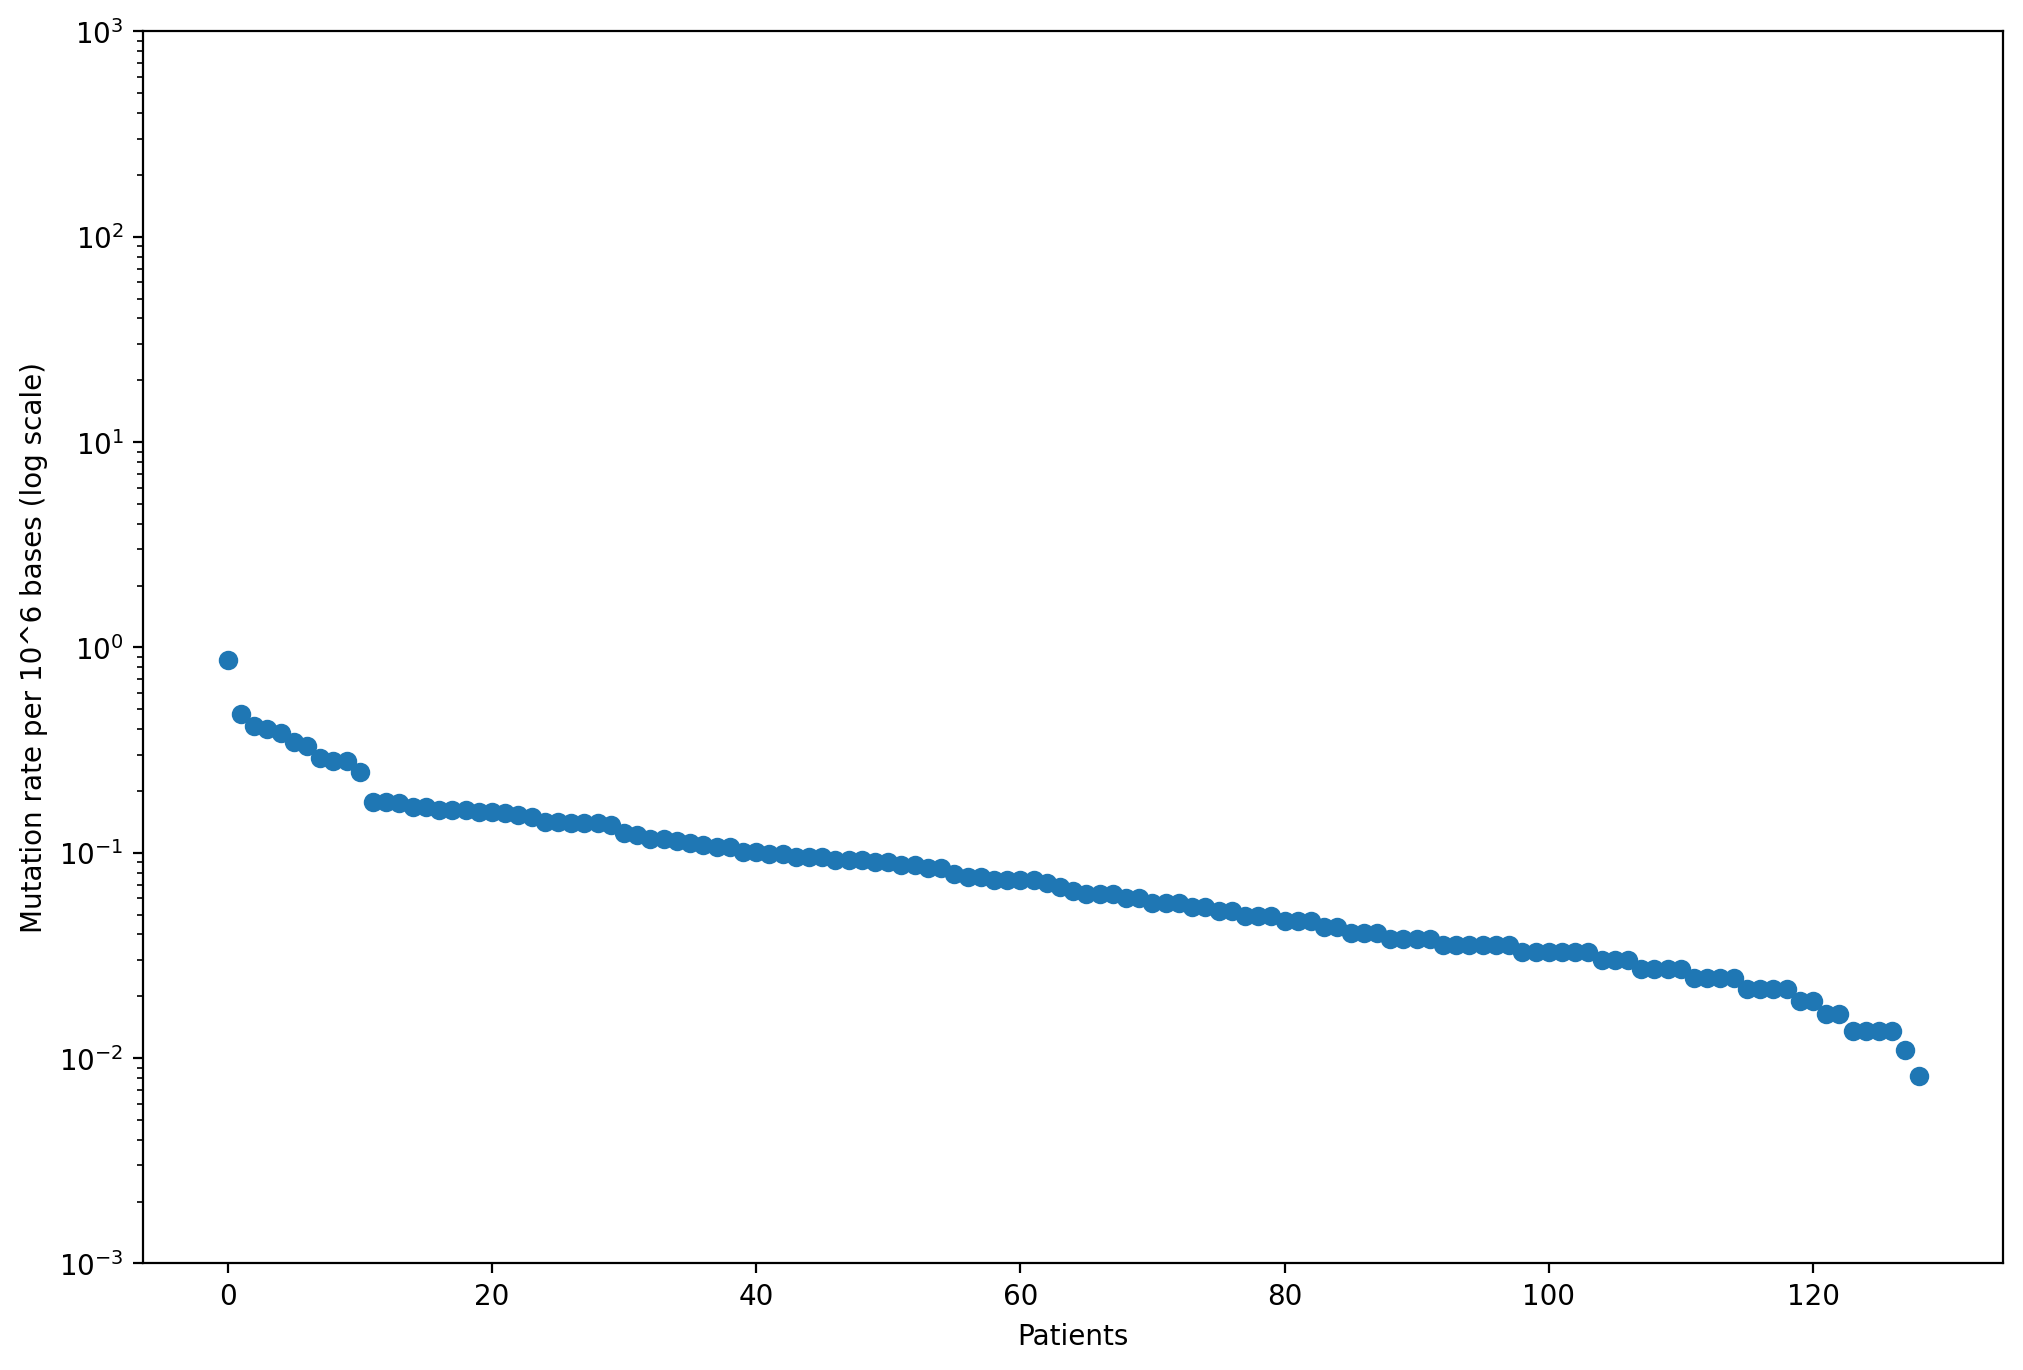

In [83]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.yscale("log") 
#set axes limit
plt.ylim(0.001, 1000)
plt.scatter(patients, mutation_rate)
plt.xlabel("Patients")
plt.ylabel("Mutation rate per 10^6 bases (log scale)")
plt.show()

### Mutation Frequency analysis

In [84]:
genes_patients_ductal_NON_TN=data_mutation_ductal_NON_TN[['PATIENT_ID', 'Hugo_Symbol']]

In [85]:
# drop duplicates
genes_patients_ductal_NON_TN=genes_patients_ductal_NON_TN.drop_duplicates()

In [86]:
n_of_pts_per_gene_ductal_NON_TN= genes_patients_ductal_NON_TN.groupby(['Hugo_Symbol'])['PATIENT_ID'].count().reset_index()
n_of_pts_per_gene_ductal_NON_TN.rename(columns = {'PATIENT_ID':'Num_pts_per_gene'}, inplace = True)

In [87]:
tot_pts_ductal_NON_TN = 129

In [88]:
# add a column to the n_of_pts_per_gene dataframe representing the mutation frequency for each gene
n_of_pts_per_gene_ductal_NON_TN["Mutation_frequency (%)"] = (n_of_pts_per_gene_ductal_NON_TN["Num_pts_per_gene"]*100)/tot_pts_ductal_NON_TN

In [89]:
# the numbers of patients per gene are sorted in descending order
n_of_pts_per_gene_ductal_NON_TN= n_of_pts_per_gene_ductal_NON_TN.sort_values(by="Num_pts_per_gene", ascending=False)

In [90]:
gene_mutation_frequency_ductal_NON_TN = n_of_pts_per_gene_ductal_NON_TN[['Hugo_Symbol', 'Mutation_frequency (%)']]

In [91]:
# select the first 50 genes
highest_mutated_genes_ductal_NON_TN=gene_mutation_frequency_ductal_NON_TN.head(50)

In [92]:
mutated_gene_names=highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'].tolist()

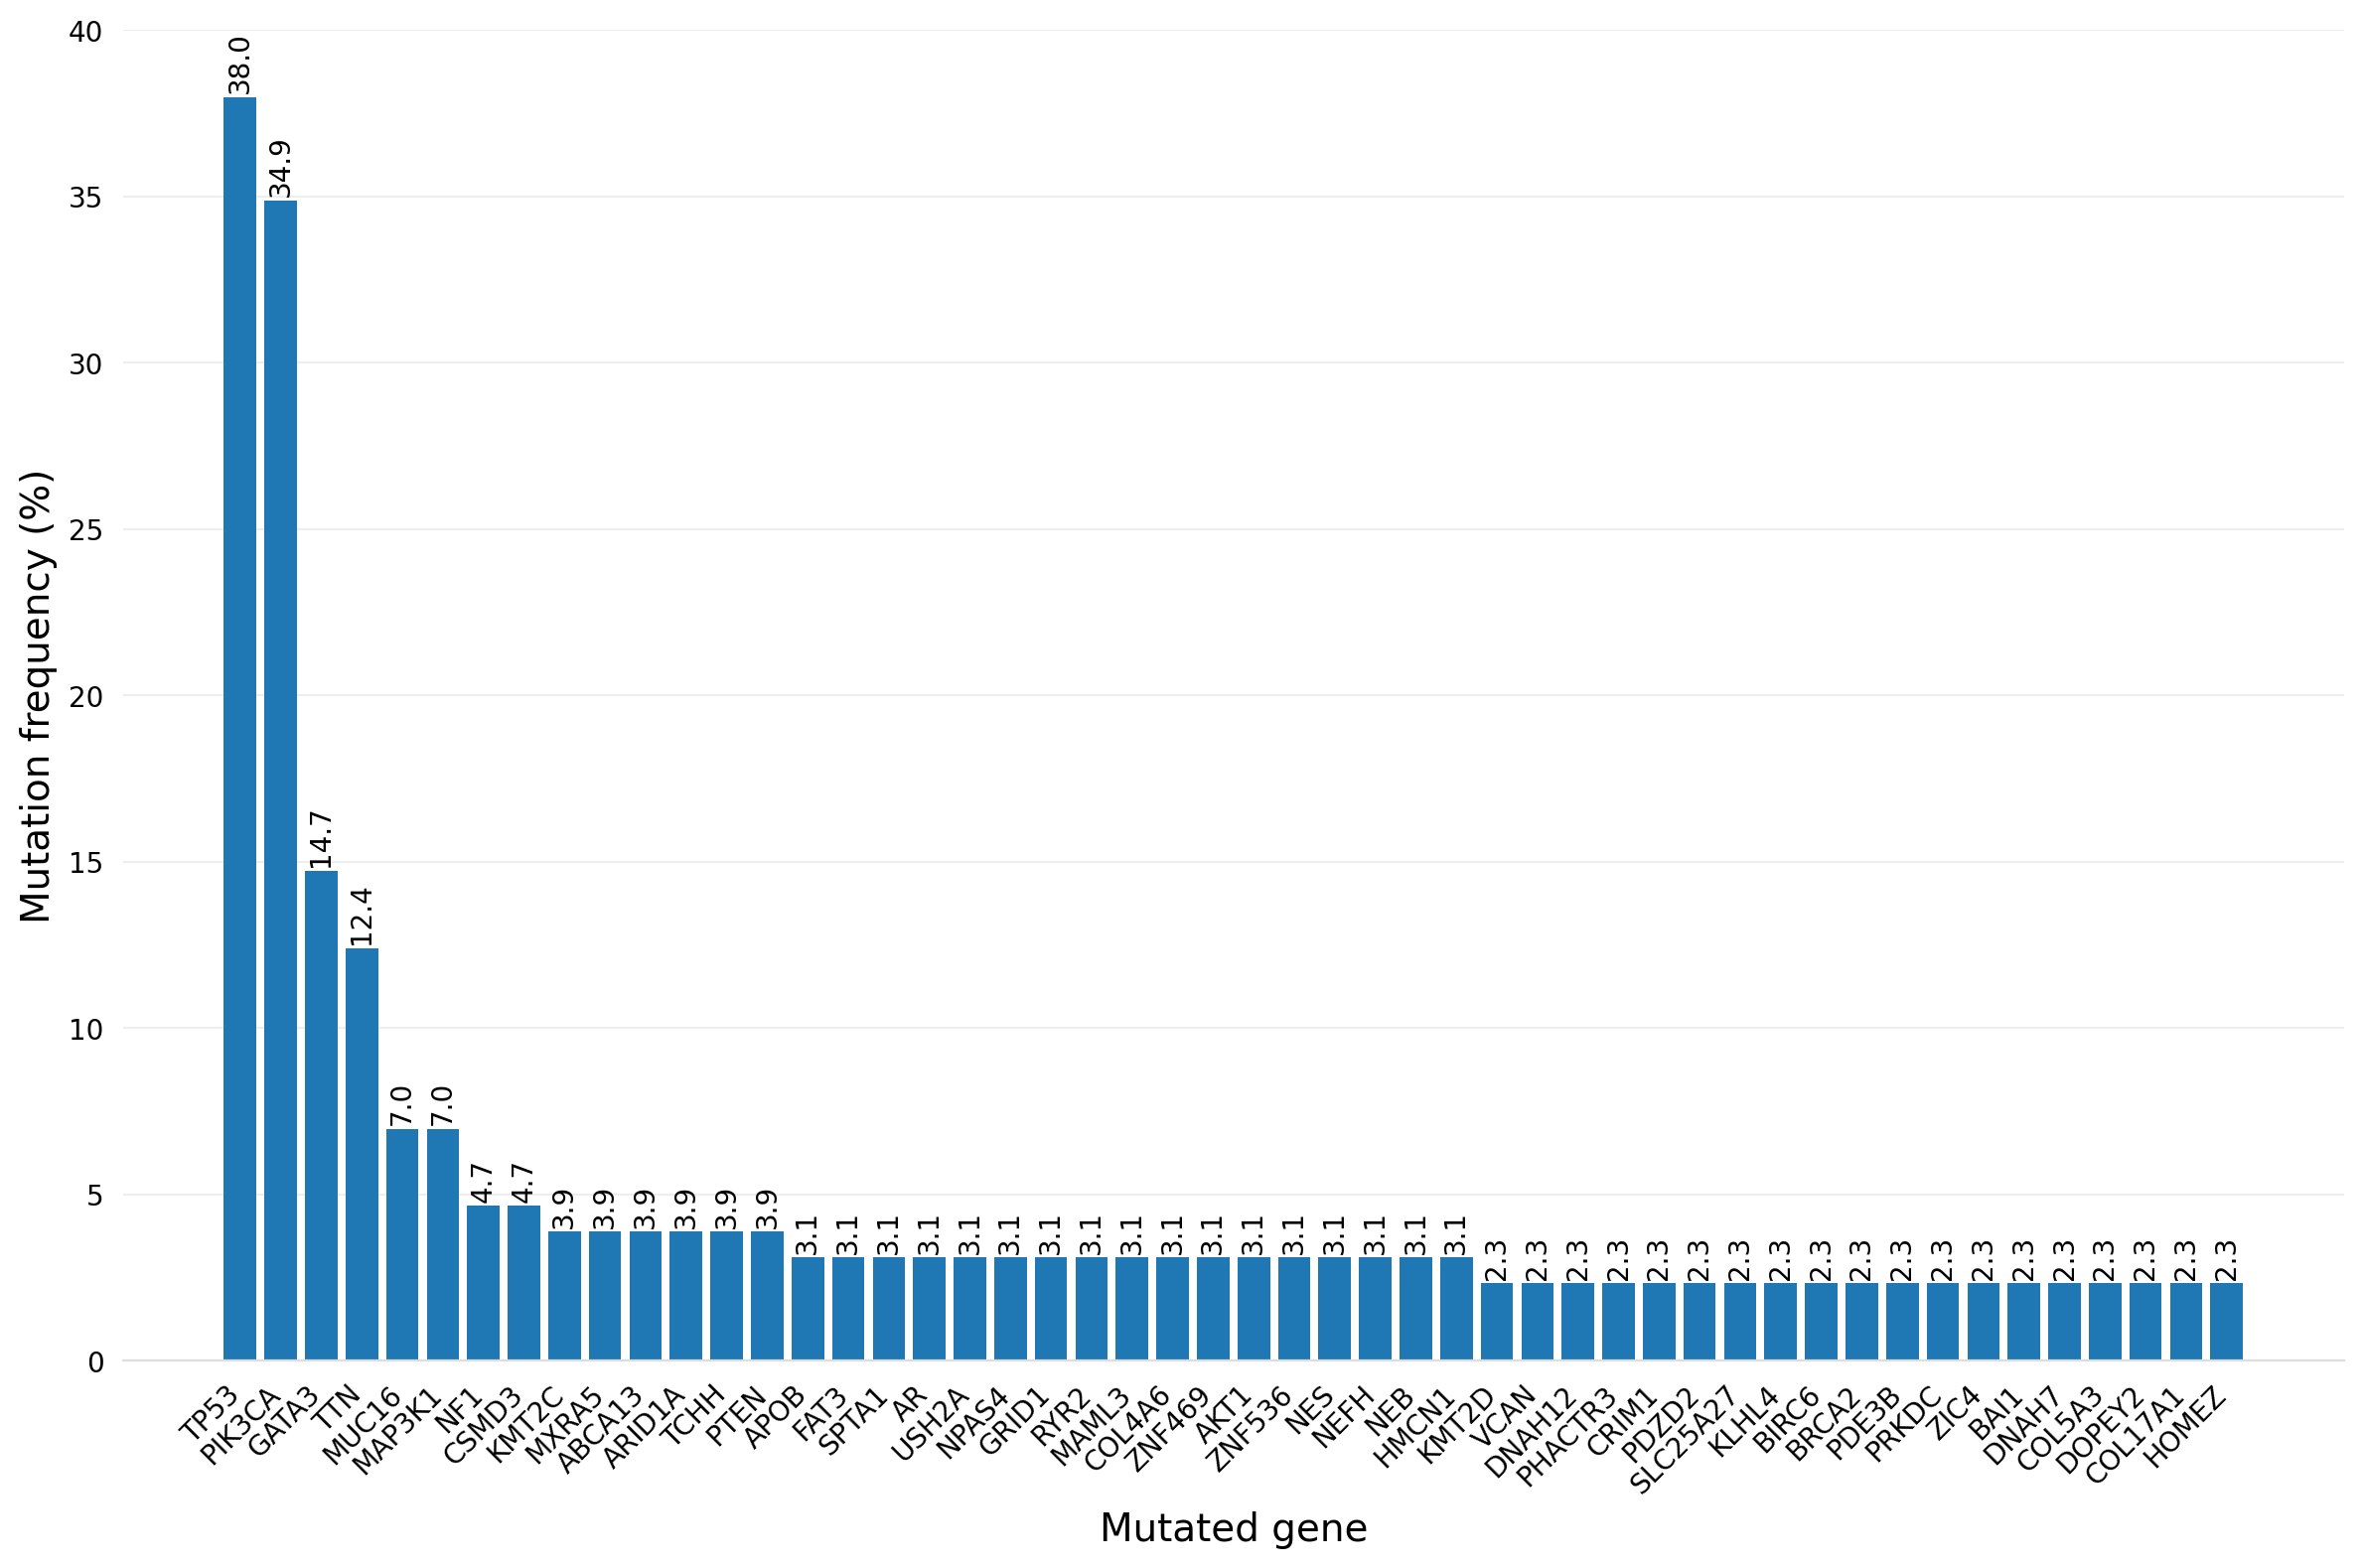

In [93]:
# increase the quality and resolution of the chart
from IPython.display import set_matplotlib_formats
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
# set default figure size.
plt.rcParams['figure.figsize'] = (12, 8)
fig, ax = plt.subplots()
h=ax.bar(highest_mutated_genes_ductal_NON_TN['Hugo_Symbol'], highest_mutated_genes_ductal_NON_TN['Mutation_frequency (%)'], label=mutated_gene_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Mutated gene', fontsize=14)
plt.ylabel('Mutation frequency (%)', fontsize=14)

plt.ylim(0, 40)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()